$\newcommand{P}{\mathbb{P}}$
$\newcommand{R}{\mathbb{R}}$
$\newcommand{Z}{\mathbb{Z}}$
$\newcommand{E}{\mathbb{E}}$
# The problem

The typical statistical problem comprises random variables
* $\theta$ - the unknown model variables we are interested in.
* $Y$ - the unknown latent variables we don't care about. 
Usualy the dimension increases with number of observations i.e. we have $Y_i$; $i \in \{1, \ldots, n\}$.
* $Z$ - observations. Usualy composed of independent parts $Z_i$.

Moreover we (pretend to) know the following probas:
* $\P(\theta)$ - prior on model parameters
* $\P(Y\mid \theta)$ - "prior" on latent variables. Usualy decomposes as $\P(Y\mid\theta) = \prod_i\P(Y_i\mid\theta)$.
* $\P(Z\mid Y,\ \theta)$ - "likelihood". Usualy $\P(Z\mid Y,\ \theta) = \prod_i \P(Z_i\mid Y_i,\ \theta)$

**Remark:**
If you are a frequentist then you can usualy take (improper) prior $\P(\theta) = 1$; $\P(Y\mid \theta)= 1$ and change the wording a bit.

# Examples
### Example from  Andel
### Sport Models in Tipsport
### Dimensionality reduction
### Clustering
### Hidden Markov models

# Solution 
There are two groups of variables: the observed stuff $Z$ and the unobserved stuff $\theta, Y$. Using standard Bayesian reasoning we get the posterior on unobserved stuff i.e. a joint $(y, \theta)$-posterior:
$$ \P(y, \theta\mid z) \propto \P(\theta) \P(y\mid \theta) \cdot \P(z\mid \theta, y)$$
What do we expect as a solution?
* Maximal joint likelihood/posterior
* Full Bayesian solution
* something in between: maximal $\theta$-posterior

#### Maximal joint posterior
$\newcommand{\argmax}[1]{\underset{#1}{\mathrm{argmax}}}$
You calculate 
$$\hat\theta, \hat y = \argmax{\theta, y}\; \P(y, \theta \mid z)$$
and keep only $\hat\theta$. This is not allways satisfactory - the Andel example.

#### Full Bayesian solution
You can sample both $(y, \theta)$ from the joint posterior

and then keep only the samle of thetas. This is equivalent to sampling thetas from the posterior 
$$\P(\theta\mid z) = \sum_y \P(y, \theta \mid z).$$

The practical problem is what to do with this sample? 

**Example**
* $\theta = (\theta_1, \theta_2) \in \R^2$ drawn from uniform prior
* $Y_i \sim \mathrm{Bernoulli}(p = \frac 1 2)  \in \{0, 1\}$ 
* $Z_i \sim \mathrm{Gauss}( \mathrm{mean} = \theta_{Y_i}, \mathrm{var} = 1)$.

Imagine that the true $\theta = (-1, 1)$ and your sample is large enough. Notice that the model is invariant w.r.t. the action of the cyclic group $(\Z_2, +)$ given by 
$$\theta_1, \theta_2 \mapsto \theta_2, \theta_1.$$ 
Thus the $\theta$-posterior will be symmetric w.r.t. the same group and will have two peaks at (-1, 1) and (1, -1). 
In particular the mean of the posterior is $\theta = (0, 0)$ that does not give a very good model.
Taking one of the maximums would be the good thing to do.

**Remark:** A hardcore Bayesian would not try to replace the distribution of $\theta$ by one value.

#### Something in between: Maximal $\theta$-posterior
$$\hat\theta = \argmax{\theta}\; \P(\theta\mid z)= \argmax{\theta} \sum_y\P(\theta, y\mid z) $$
This is usualy the right thing to do. The following section is about how to calculate it.

# EM algorithm
#### The algorithm repeats two steps:
* **E-step:** for fixed $\tilde\theta$ calculate the "posterior density of $y$ given $z$, $\theta$":
$$\tilde P(y) := \P(y\mid \tilde\theta, z) \propto \P(y\mid \tilde\theta) \cdot \P(z\mid \tilde\theta, y)$$
* **M-step:** Now fix $\tilde P$ and maximize
$$\tilde\theta = \argmax{\theta}\; \E_{\tilde P}\Big[\log\P(z, y, \theta) \Big]$$
(Expressing it using the given functions: $\P(z, y,\theta) = \P(z\mid \theta, y)\cdot\P(y\mid \theta) \cdot \P(\theta) $.)

#### False intuition but good mnemonic
We pretend to have a decent estimate $\tilde\theta$ of true $\theta_\mathrm{true}$ and we want to ameliorate it.

In the E-step we calculate $\tilde P(y) := \P(y\mid \tilde\theta, z)$ which we hope approximates $\P(y\mid \theta_\mathrm{true}, z)$. 

In the M-step we use the estimate $\tilde P$ to get better $\tilde \theta$. If we knew the value $y$ of $Y$ exactly, we could find our $\theta$ by maximizing $\log\P(z, y, \theta) $. We do not know $y$ exactly, only its approximate distribution $\tilde P(y)$. Thus it is natural to look for $\theta$ by maximizing $\E_{\tilde P(y)}\log\P(z, y, \theta)$.

#### Typical case
* $Z = (Z_i;\, i \in \{1,\ldots n\})$; $Y = (Y_i;\, i \in \{1,\ldots n\})$
* $\P(Y|\theta) = \prod_i \P(Y_i|\theta)$ (i.e. $Y_i$ are independent conditionaly on $\theta$)
* $\P(Z|Y, \theta) = \prod_i \P(Z_i| Y_i, \theta)$

Then the above EM-algorithm can be formulated as
* **E-step:** for fixed $\theta$ and each $i$ calculate "posterior density of $Y_i$ given $z_i$, $\theta$":
$$ P_i(y) := \P(Y_i = y\mid \theta, z_i) \propto \P(Y_i = y\mid \theta) \cdot \P(z_i\mid \theta, Y_i = y)$$
* **M-step:** Now fix all $P_i$ and maximize
$$\theta = \argmax{\theta}\; \bigg\{\log\P(\theta) + \sum_i\E_{P_i(y)}\Big[\log\P(z_i, Y_i = y| \theta) \Big] \bigg\}$$

## Pista's implementation
* **E-step:** for fixed $\tilde\theta$ use MCMC (Metropolis-Hastings) to draw samples $\{y^{(j)}\mid j \in \{1,\ldots, m \}\}$ from the unnormalized density
$$y\mapsto  \P(y\mid \tilde\theta) \cdot \P(z\mid \tilde\theta, y)$$
* **M-step:** Now fix the samples $\{y^{(j)}\}$ and maximize
$$\tilde\theta = \argmax{\theta}\; \sum_j\log\Big(\P(z\mid \theta, y^{(j)}) \cdot\P(y^{(j)}\mid \theta) \cdot \P(\theta)\Big) $$

##### Implementation details
In the usual case $(Z, Y)$ is composed of many indepednent (conditionaly on $\theta$) components $(Z_i, Y_i); \ i \in \{1, \ldots, n\}$. Thus the the MCMC stepping can be done simultaneously and independently with all components.

Another point is that drawing $m$ samples
$$y^{(j)} = \big[y^{(j)}_1,\ldots, y^{(j)}_n\big] \quad j\in \{1,\ldots, m\}$$
in the E-step is equivalent to pretending that we have $m$-times more observations (just copy them $m$-times):
$$Z_{1}, \ldots Z_{n},\; Z_{1}, \ldots Z_{n},\; \ldots Z_{1}, \ldots Z_{n},\;$$
and drawing only one sample $y^{\mathrm{sample}}$. Thus the algorithm simplifies as
* **E-step:** with fixed $\theta$ make several MCMC updates of all $y$ with the unnormalized densities
$$y \mapsto  \P(y\mid \theta) \cdot \P(z\mid \theta, y)$$
(Each such update is a batch of independent MCMC updates of all $y_i$ with the unnormalized densities $y_i\mapsto  \P(y_i\mid \theta) \cdot \P(z_i\mid \theta, y_i)$).
* **M-step:** with fixed $y$ make several gradient-descent steps in $\theta$ as if trying to maximize the function of $\theta$
$$\theta \mapsto \log\big(\P(\theta) \cdot\P(y\mid \theta) \cdot \P(z\mid \theta, y)\big)$$

Actually, when the number $n$ of observations is large one can take $m = 1$ i.e. not copy the observations.

**Remark:** (Similarity to joint $(y,\theta)$-posterior maximization) The maximization of the joint posterior
$$ \P(y, \theta\mid z) \propto \P(y, \theta, z ) = \P(\theta) \cdot\P(y\mid \theta) \cdot \P(z\mid \theta, y)$$
can be also done by repeating two maximization steps
* **$M_y$-step:** with fixed $\theta$ maximize w.r.t. $y$
$$y \mapsto  \P(y, \theta, z ) \propto \P(y\mid \theta) \cdot \P(z\mid \theta, y)$$
(Each such update is a batch of independent maximizations for all $y_i$ of the unnormalized densities $y_i\mapsto  \P(y_i\mid \theta) \cdot \P(z_i\mid \theta, y_i)$).
* **$M_\theta$-step:** with fixed $y$ maximize w.r.t. $\theta$ 
$$\theta \mapsto  \P(y, \theta, z ) = \P(\theta) \cdot\P(y\mid \theta) \cdot \P(z\mid \theta, y)$$

This analogy becomes clearer in the context of variational inference. Note that the standard simplest algorithms for clusterization and linear dimensionality reduction are special cases of this "MM" algorithm.


## Reasonability of the EM-algorithm

### Prerequisities
$\newcommand{\KL}[2]{D_{KL}\left({#1}\middle\| {#2}\right)}$
**Definitions:**
Let $P$, $Q$ be probability densities on some set (wrt. some uderlying measure).
* Entropy: $$ H(P) = \sum_y P(y) \ \log\frac{1}{P(y)}$$
* Kullback-Leibler divergence $$\KL{P}{Q} = \sum_y P(y)\  \log\frac{P(y)}{Q(y)}$$

**Lemma:** (Gibbs inequality)
If $P$, $Q$ are as above then 
$$\KL{P}{Q} \geq 0 \quad\left(\text{ equivalently }\sum_y P(y)\  \log\frac{1}{P(y)} \leq \sum_y P(y)\  \log\frac{1}{Q(y)}\right)$$
with equality only if $P(y) = Q(y)$ almost everywhere.

**Lemma:** (Jensen's inequality)
Let $X:\Omega \to \R$ be a random variable and let $f:\R\to\R$ be a convex function. Then 
$$f(\E X) \leq \E\big[ f(X)\big].$$
If $f$ is strictly convex then the equality holds only in the case when $X$ is a constant (almost everywhere).

**Proof of Gibbs**: Use Jensen for strictly convex $f(u) = -\log(u)$ and a random variable having values $\frac{Q(y)}{P(y)}$ with probas $P(y)$ (i.e. $\Omega$ is the set of all possible values of $y$).
$$\KL{P}{Q} = \sum_y P(y)\cdot  f\left(\frac{Q(y)}{P(y)}\right) \geq  f\left(\sum_y P(y)\cdot  \frac{Q(y)}{P(y)}\right) = f(1) = 0$$

### A function $F$ that increases in each step
Define a function $F$ of two variables $P, \theta$ there $P$ is a probability measure on $y$ and $\theta$ is well, a value of model variables $\theta$.
$$
\begin{align}
F(P, \theta) & := \E_P\Big[\log \P(y, z, \theta)\Big] + H(P) =\tag{F1}\\ 
& = \E_P\Big[\log \P(y, z\mid \theta)\Big] + H(P) + \log\P(\theta) = \\
& = \sum_y P(y)\log\frac{\P(y,z\mid \theta)}{P(y)} + \log\P(\theta) = \\
&= -D_{KL}\big[P(y)\ \big\|\  \P(y\mid z, \theta)\big] + \log\big[\P(z\mid\theta) \P(\theta)\big] \tag{F2}
\end{align}
$$
Here the 1st and the last line are important.
Using $F$ we van reformulate the EM-algorithm:
* **E-step:** For fixed $\tilde\theta$:
$$\tilde P := \argmax{P}\; F(P, \tilde\theta)$$
* **M-step:** For fixed $\tilde P$:
$$\tilde\theta = \argmax{\theta}\; F(\tilde P, \theta)$$

Here the equivalence of E-steps is ensured by (F2) and the equivalence of M-steps by (F1).

In the view of this formulation there is a reasonable hope that the EM algorithm will converge to a maximum of $F$. (Of course it can converge to a local maximum or a saddle point. I don't even see any reason why $P,\theta$ should converge at all (probably usualy some compactness arguments can be used). Of course the values of $F(P,\theta)$ converge.)

### The maximum of $F$ is what we want
Denote $\hat P, \hat \theta$ the maximum of $F$. From the above, we see that $\hat P(y) = \P(y\mid z,\theta)$ and thus 
$$
\begin{align}
\hat\theta &= \argmax{\theta}\Big\{\E_{\P(y\mid z,\theta)} \big[\log\P(y, z, \theta)\big]  + H\big[\P(y\mid z, \theta)\big] \Big\}=\\
&=\argmax{\theta}\sum_y \P(y\mid z, \theta) \ \log\frac{\P(y, z, \theta)}{\P(y\mid z,\theta)} = \quad\bigg(\text{now use } \frac{\P(y, z, \theta)}{\P(y\mid z,\theta)} = \P(z, \theta)\bigg) \\
&= \argmax{\theta}\Big\{ \log\P(z,\theta)\cdot\sum_y\P(y\mid z,\theta)\Big\} = \\
&= \argmax{\theta}\; \log\P(z, \theta) = \argmax{\theta}\; \log\P(\theta\mid z) 
\end{align}
$$

In [1]:
x = 2
x + 5

7

In [3]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np


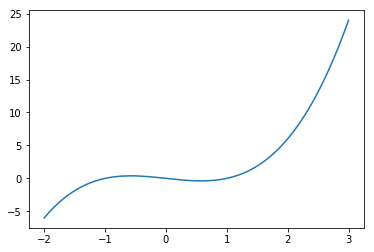

In [4]:
x = np.linspace(-2, 3, 200)
pl.plot(x, x**3 - x)

# Variational methods
Here we review some basics about variational inference in order to see that the mysterious function $F$ from EM-algorithm appears naturally in this context.

#### General problem
Consider
* $U(x)$ - un-normalized density on $x$
* $Q(x, q)$ - family of normalized proba-densities on $x$ parametrized by $q$

Denote
* $Z:= \sum_x U(x)$ so that $\frac{U(x)}{Z}$ is a normalized density on $x$.

Problems:
* find $q$ s.t. $Q(x, q)$ optimaly (in some sense) approximates $\frac{U(x)}{Z}$
* estimate $Z$

#### Minimization of Kullback-Leibler divergence
One possible distance between $Q(x, q)$ and $\frac{U(x)}{Z}$ is the KL-divergence. Thus we want to minimize
$$\KL{Q(x, q)}{\frac U Z}.$$
The slight hindrance is that we don't know $Z$. But we can introduce the "divergence without normalizing factor" (and with a minus sign):
$$ 
\begin{align}
F(q) &= \sum_x Q(x, q) \log\frac{U(x)}{Q(x, q)} = \\
&= -\KL{Q(x, q)}{\frac U Z} + \log Z
\end{align}
$$
So the minimization of $D_{K,L}$ is equivalent to maximization of $F$.

Actually, the maximal value of $F$ is usualy a reasonable approximation of $\log Z$.$\newcommand{qm}{q_{max}}$ Denote $\qm$ the value of $q$ maximizing $F(q)$. If the family $Q$ is rich enough we can expect $\KL{Q(x, \qm)}{\frac U Z}$ to be small (and positive by Gibbs). So from 
$$F(\qm) = -\KL{Q(x, \qm)}{\frac U Z} + \log Z$$
we can expect $F(\qm)$ to be a reasonable lower estimate on $\log Z$.

There are two use cases and corresponding terminologies: Bayesian statistics and statistical physics.
#### Bayesian incarnation
In a Bayesian statistical model we have unknown parameters $\theta$, observations $y$ and we are given the following functions
* $\theta\mapsto \P(\theta)$ - prior on $\theta$
* $y, \theta \mapsto \P(y\mid \theta)$ - likelihood function.

In this context
* $U(\theta) = \P(\theta) \P(y\mid \theta)$ is the unnormalized Bayesian posterior
* $Z = \sum_\theta U(\theta) = \P(y)$ is the **evidence** of the current model. Actualy, sometimes $\log Z$ is called evidence. 
* $F(q)$ is called the **Evidence lower bound** since by Gibbs $F(q) 
\geq \log Z$

#### Statistical physics (please skip)
Consider a physical system with given energy function $$x\mapsto E(x) \quad \text{(here $x$ is a microstate)}$$ and inverse temperature $\beta$. (The relation to the ordinary temperature is $\beta = \frac{1}{k\cdot T}$ where $T$ is the temperature and $k$ is the Boltzman constant. Thus $\beta \cdot E(x)$ has no units.)
* $U(x) = \exp\left(-\beta \ E(x)\right)$ is the unnormalized Boltzman distribution
* $Z(\beta) = \sum_x \exp\left(-\beta \ E(x)\right)$ is called the **partition function** or **statistical sum**
* **Variational free energy** is also denoted by $F$ but has a different sign and is rescaled by $\beta$:
$$F_{\mathrm{physics}}(q, \beta) = -\frac{1}{\beta} F(q)=-\frac{1}{\beta}\sum_x Q(x, q) \log\frac{U(x)}{Q(x, q)}$$
Thus $F_{\mathrm{physics}}$ has the same units as energy and we want to minimize it (as usualy happens with energies).


#### Maximal posterior as a variational method
We return to the simple Bayesian model: $\theta$ are the unknown model parameters and $Y$ is the observation. The unnormalized posterior is
$$U(\theta) = \P(\theta) \P(y\mid \theta)$$

For simplicity assume that the parameter $\theta$ is discrete.
As our variational family $Q$ we choose the delta-distributions on the space of model parameters and denote the variational parameter by $\tilde\theta$:
$$ Q_{\tilde\theta} (\theta) = \delta_{\tilde\theta}(\theta)$$
We want to minimize the $D_{KL}\big[\delta_{\tilde\theta}(\theta),\ \P(\theta\mid z)\big]$ what amounts to maximizing
$$
\begin{align}
F(\tilde\theta) &= \sum_\theta \delta_{\tilde\theta}(\theta)\log\frac{U(\theta)}{\delta_{\tilde\theta}(\theta)} =\\
&=\log U(\tilde\theta) - \log\delta_{\tilde\theta}(\tilde\theta)=\log U(\tilde\theta)
\end{align}
$$

**Remark**: We used here that $\delta_{\tilde\theta}(\tilde\theta) = 1$ and thus $\log\delta_{\tilde\theta}(\tilde\theta) = 0$ if $\theta$ is discrete. If $\theta$ is not discrete then strictly speaking $\delta_{\tilde\theta}(\tilde\theta) = \infty$. However, one can think of $\delta_{\tilde\theta}$ as $\delta_{\tilde\theta} \sim \frac{1}{d\theta}\chi_{[\tilde\theta, \tilde\theta + d\theta]}$ (in the case when $\theta\in \R$) so $\log\delta_{\tilde\theta}(\tilde\theta) \sim \log\frac{1}{d\theta}$ is just a large constant and one can disregard it. 

In [1]:
#Note however that the meaning of the interval $[\tilde\theta, \tilde\theta + d\theta]$ depends on the choice of coordinates. This is to be expected however -- the maximal posterior itself depends on coordinates.

#### Connection to EM-algorithm
We return to the notation used in the discussion of EM-algorithm:
* $\theta$ - unknown model variables
* $Y$ - unknown latent variables
* $Z$ - observations.

Bayes gives us the posterior on $\theta, Y$:
$$\P(y, \theta\mid z) \propto \P(y, \theta, z)$$
Our variational family $Q$ will be parametrized by two parameters: 
* $\tilde P(y)$ - a proba measure on $y$
* $\tilde\theta$ - a value of the model params.

The proba measure $Q_{(\tilde P, \tilde \theta)}$ will be just the cartesian probuct of the two measures:
$$Q_{(\tilde P, \tilde \theta)}(y, \theta) = \tilde P(y) \cdot \delta_{\tilde\theta}(\theta).$$
Calculate the ELBO:
$$
\begin{align}
F(\tilde P, \tilde\theta) &= \sum_{y, \theta} Q_{(\tilde P, \tilde\theta)}(y, \theta)\cdot \log\frac{\P(z, y, \theta)}{Q_{(\tilde P, \tilde\theta)}(y, \theta)} =\\
&= \sum_y \tilde P(y) \cdot \log\frac{\P(z, y, \tilde\theta)}{\tilde P (y)}- \log\delta_{\tilde\theta}(\tilde\theta) = \quad\big(\text{if $\theta$ is discrete  then $\log\delta_{\tilde\theta}(\tilde\theta) = 0$}\big) \\
&= \E_{\tilde P} \big[\log\P(z,y, \tilde\theta)\big] + H(\tilde P)
\end{align}
$$
So we see that we get the same function $F$ as in the "proof" of the EM-algorithm.